In [1]:
import pandas as pd
from igraph import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scouts = pd.read_csv('scouts.csv',low_memory=False)

In [3]:
users = pd.read_csv('users_and_mean_rating.csv',low_memory=False)

In [4]:
g = Graph(directed=True)

In [5]:
mini =50
maxi =100

In [7]:
users_list = users.loc[users['nb_eclaireurs']>mini]
users_list =  users_list.loc[users_chosen['nb_eclaireurs']<=maxi]
users_list 

NameError: name 'users_chosen' is not defined

In [8]:
user_chosen=users_list.sample()
user_id=user_chosen["user_id"].tolist()[0]
user_id

35531

In [9]:
scout_list=scouts.loc[scouts['user_id']==user_id]
scout_list

,Unnamed: 0,id,user_id,user_id_scout,date_creation
168249,168249,211407,35531,35477,2011-03-22
168250,168250,211408,35531,23366,2011-03-22
168251,168251,211409,35531,34117,2011-03-22
168252,168252,211414,35531,481,2011-03-28
168253,168253,211419,35531,1989,2011-06-26
...,...,...,...,...,...
695386,695386,911193,35531,40347,2014-06-08 19:42:10
695748,695748,911662,35531,130972,2014-06-09 10:36:35
695777,695777,911697,35531,146106,2014-06-09 11:21:42
704443,704443,924829,35531,23043,2014-06-19 20:50:30


In [10]:
id_scout= scout_list['user_id_scout'].tolist()
id_scout.sort()
id_scout

[118,
 481,
 616,
 1556,
 1989,
 2247,
 2634,
 2913,
 3209,
 3442,
 3468,
 3517,
 4011,
 4018,
 4586,
 6147,
 7079,
 9308,
 11996,
 12303,
 13255,
 13427,
 14034,
 14264,
 16565,
 19227,
 19364,
 21110,
 21479,
 23008,
 23043,
 23366,
 23648,
 24046,
 24125,
 25191,
 25711,
 28020,
 28239,
 28251,
 29510,
 32100,
 34117,
 34558,
 35057,
 35464,
 35477,
 35506,
 35512,
 36218,
 37262,
 37330,
 38560,
 38723,
 39050,
 39234,
 39581,
 40347,
 40777,
 41694,
 43278,
 43332,
 43967,
 45562,
 45730,
 46102,
 46132,
 48378,
 50417,
 51189,
 52027,
 52516,
 53239,
 54689,
 54788,
 55475,
 57396,
 57635,
 60219,
 66602,
 69664,
 69816,
 75040,
 75100,
 76154,
 76508,
 77542,
 78868,
 80929,
 83394,
 87589,
 90465,
 90553,
 91623,
 93901,
 103473,
 117647,
 127580,
 130972,
 145829,
 146106,
 153754]

In [11]:
final_list=users.loc[users['user_id'].isin( id_scout)]

In [12]:
final_list

,Unnamed: 0,user_id,nb_eclaireurs,nb_suiveurs,nb_critiques,nb_notes,moyenne_notes
39717,39717,127580,78,60,52,265.0,7.094340
48563,48563,1556,51,640,188,229.0,7.493450
49158,49158,3209,19,14,36,724.0,6.066298
50479,50479,9308,75,118,85,344.0,6.863372
52601,52601,2247,31,224,513,1092.0,6.592491
...,...,...,...,...,...,...,...
67725,67725,41694,76,4049,507,5795.0,7.032269
67769,67769,69664,284,2172,278,4328.0,6.944085
67802,67802,16565,269,2333,323,3693.0,5.882480
67810,67810,24046,66,2782,158,8242.0,5.708809


In [16]:
user_id       = final_list['user_id'].tolist()
nb_eclaireurs = final_list['nb_eclaireurs'].tolist()
nb_suiveurs   = final_list['nb_suiveurs'].tolist()
nb_critiques  = final_list['nb_critiques'].tolist()
nb_notes      = final_list['nb_notes'].tolist()
moyenne_notes = final_list['moyenne_notes'].tolist()
n = len(user_id)

In [17]:
g.add_vertices(n)

In [18]:
g.vs["user_id"]       = user_id
g.vs["nb_eclaireurs"] = nb_eclaireurs
g.vs["nb_suiveurs"]   = nb_suiveurs
g.vs["nb_critiques"]  = nb_critiques
g.vs["nb_notes"]      = nb_notes
g.vs["moyenne_notes"] = moyenne_notes

In [19]:
for user in user_id:
    sc=scouts.loc[scouts['user_id']==user]['user_id_scout'].tolist()
    for j in range(len(sc)):
        if sc[j] in user_id:
            g.add_edges([(user_id.index(user),user_id.index(sc[j]))])

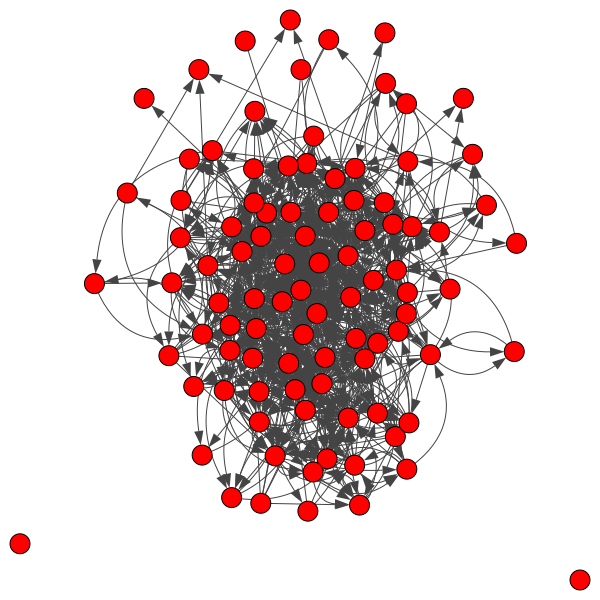

In [20]:
layout = g.layout("kk")
#g = g.as_directed()
plot(g, layout = layout)

In [21]:
g.save("graph_egocentré.gml")